In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

In [3]:
dataset = pd.read_csv(r"D:\P1 Anna\python_ml_end_to_end\notebook\data\data.csv")
dataset.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
dataset.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [6]:
dataset.duplicated().sum()

0

In [8]:
dataset.dtypes

gender                         object
race_ethnicity                 object
parental_level_of_education    object
lunch                          object
test_preparation_course        object
math_score                      int64
reading_score                   int64
writing_score                   int64
dtype: object

In [9]:
dataset.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [15]:
numeric_col = [i for i in dataset.columns if dataset[i].dtype!="object"]
catergorical_col = [i for i in dataset.columns if dataset[i].dtype =="object"]
print(numeric_col)
print(catergorical_col)

['math_score', 'reading_score', 'writing_score']
['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [16]:
dataset["total_score"] = dataset["reading_score"]+dataset["writing_score"]+dataset["math_score"]
dataset["average"] = dataset["total_score"]/3
dataset["Percentage"] = (dataset["total_score"]/(dataset["math_score"].max()+dataset["reading_score"].max()+dataset["writing_score"].max()))*100

In [17]:
dataset.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average,Percentage
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333,76.333333


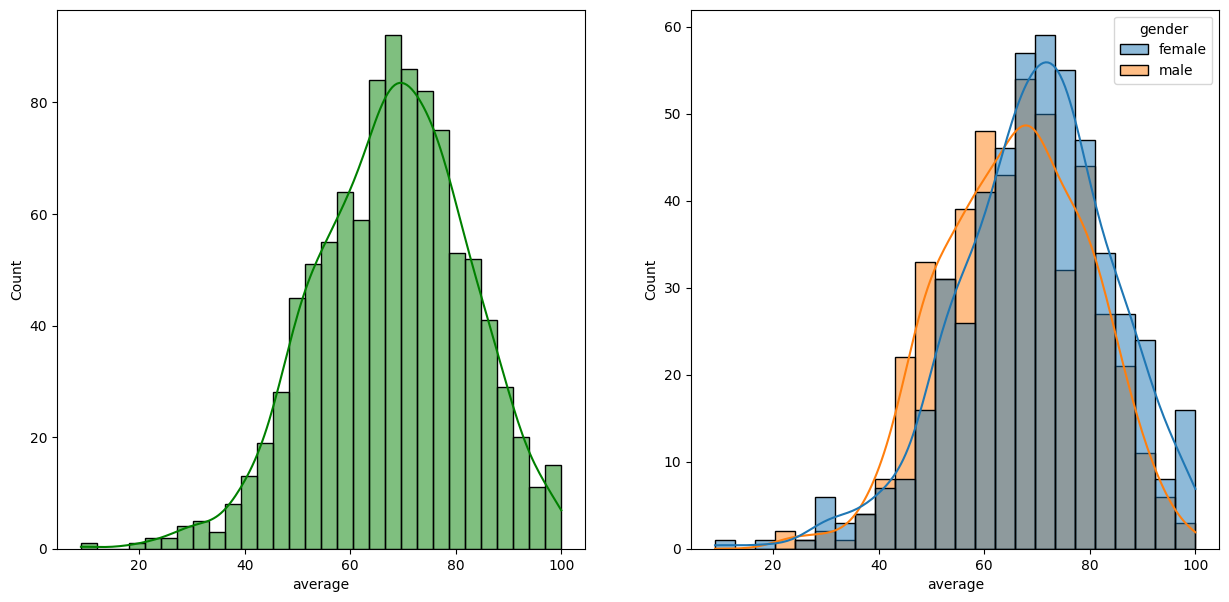

In [19]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=dataset,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=dataset,x='average',kde=True,hue='gender')
plt.show()

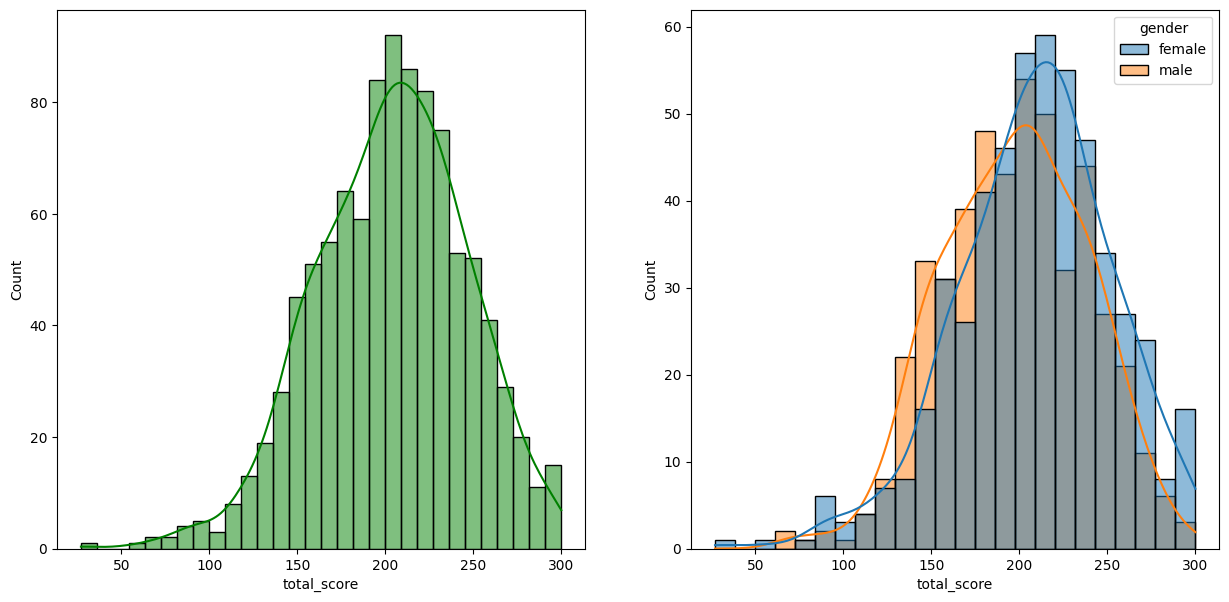

In [21]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=dataset,x='total_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=dataset,x='total_score',kde=True,hue='gender')
plt.show()

C:\Users\mdcha\AppData\Local\Temp\ipykernel_2804\406063192.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(141)
C:\Users\mdcha\AppData\Local\Temp\ipykernel_2804\406063192.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(142)
C:\Users\mdcha\AppData\Local\Temp\ipykernel_2804\406063192.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(143)


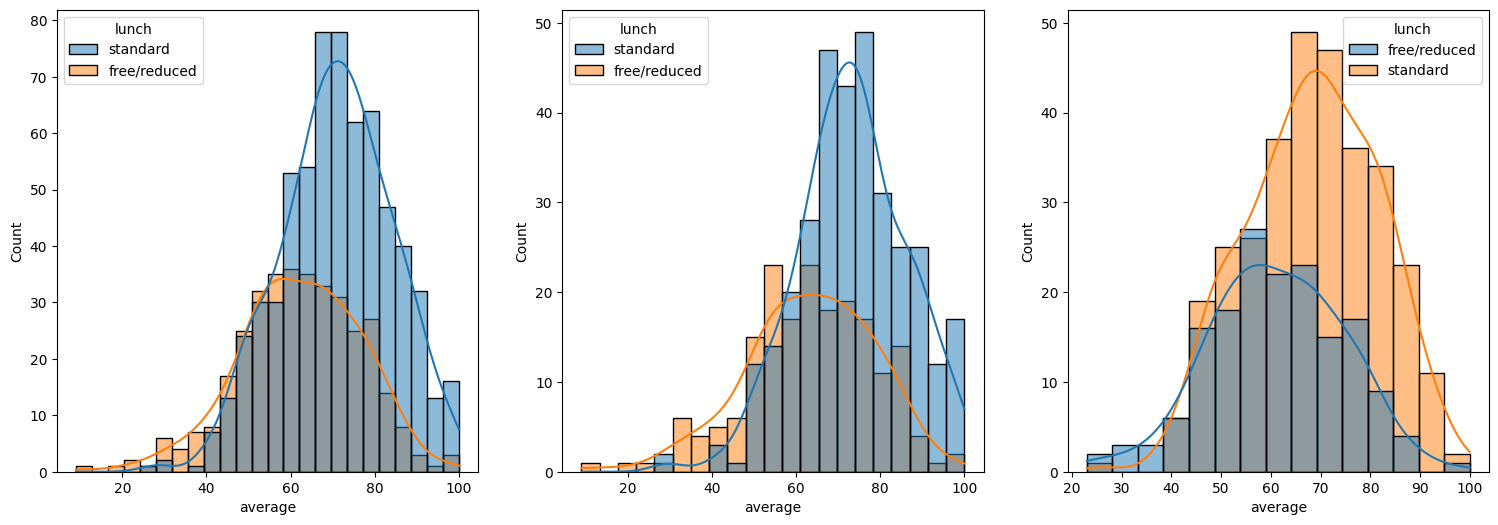

In [22]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=dataset,x='average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=dataset[dataset.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=dataset[dataset.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()

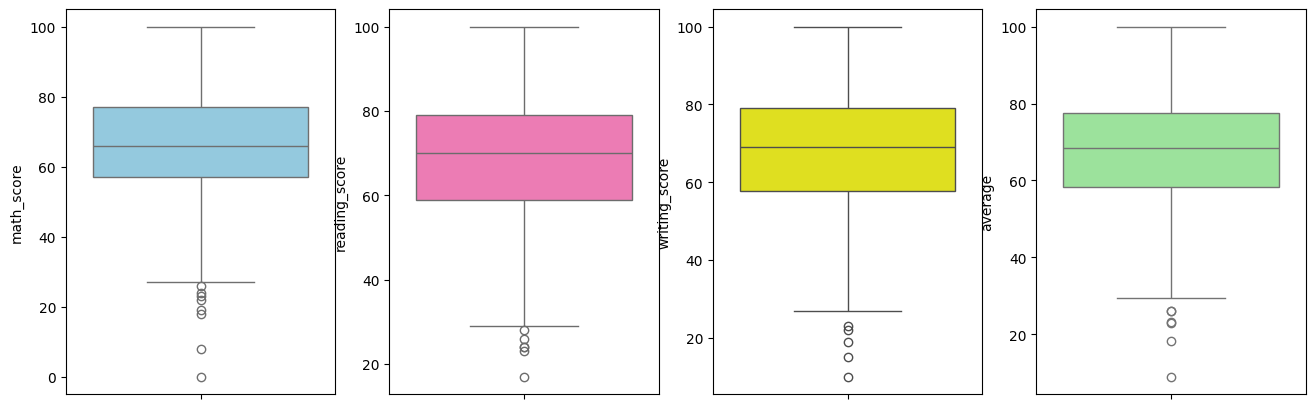

In [23]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(dataset['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(dataset['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(dataset['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(dataset['average'],color='lightgreen')
plt.show()

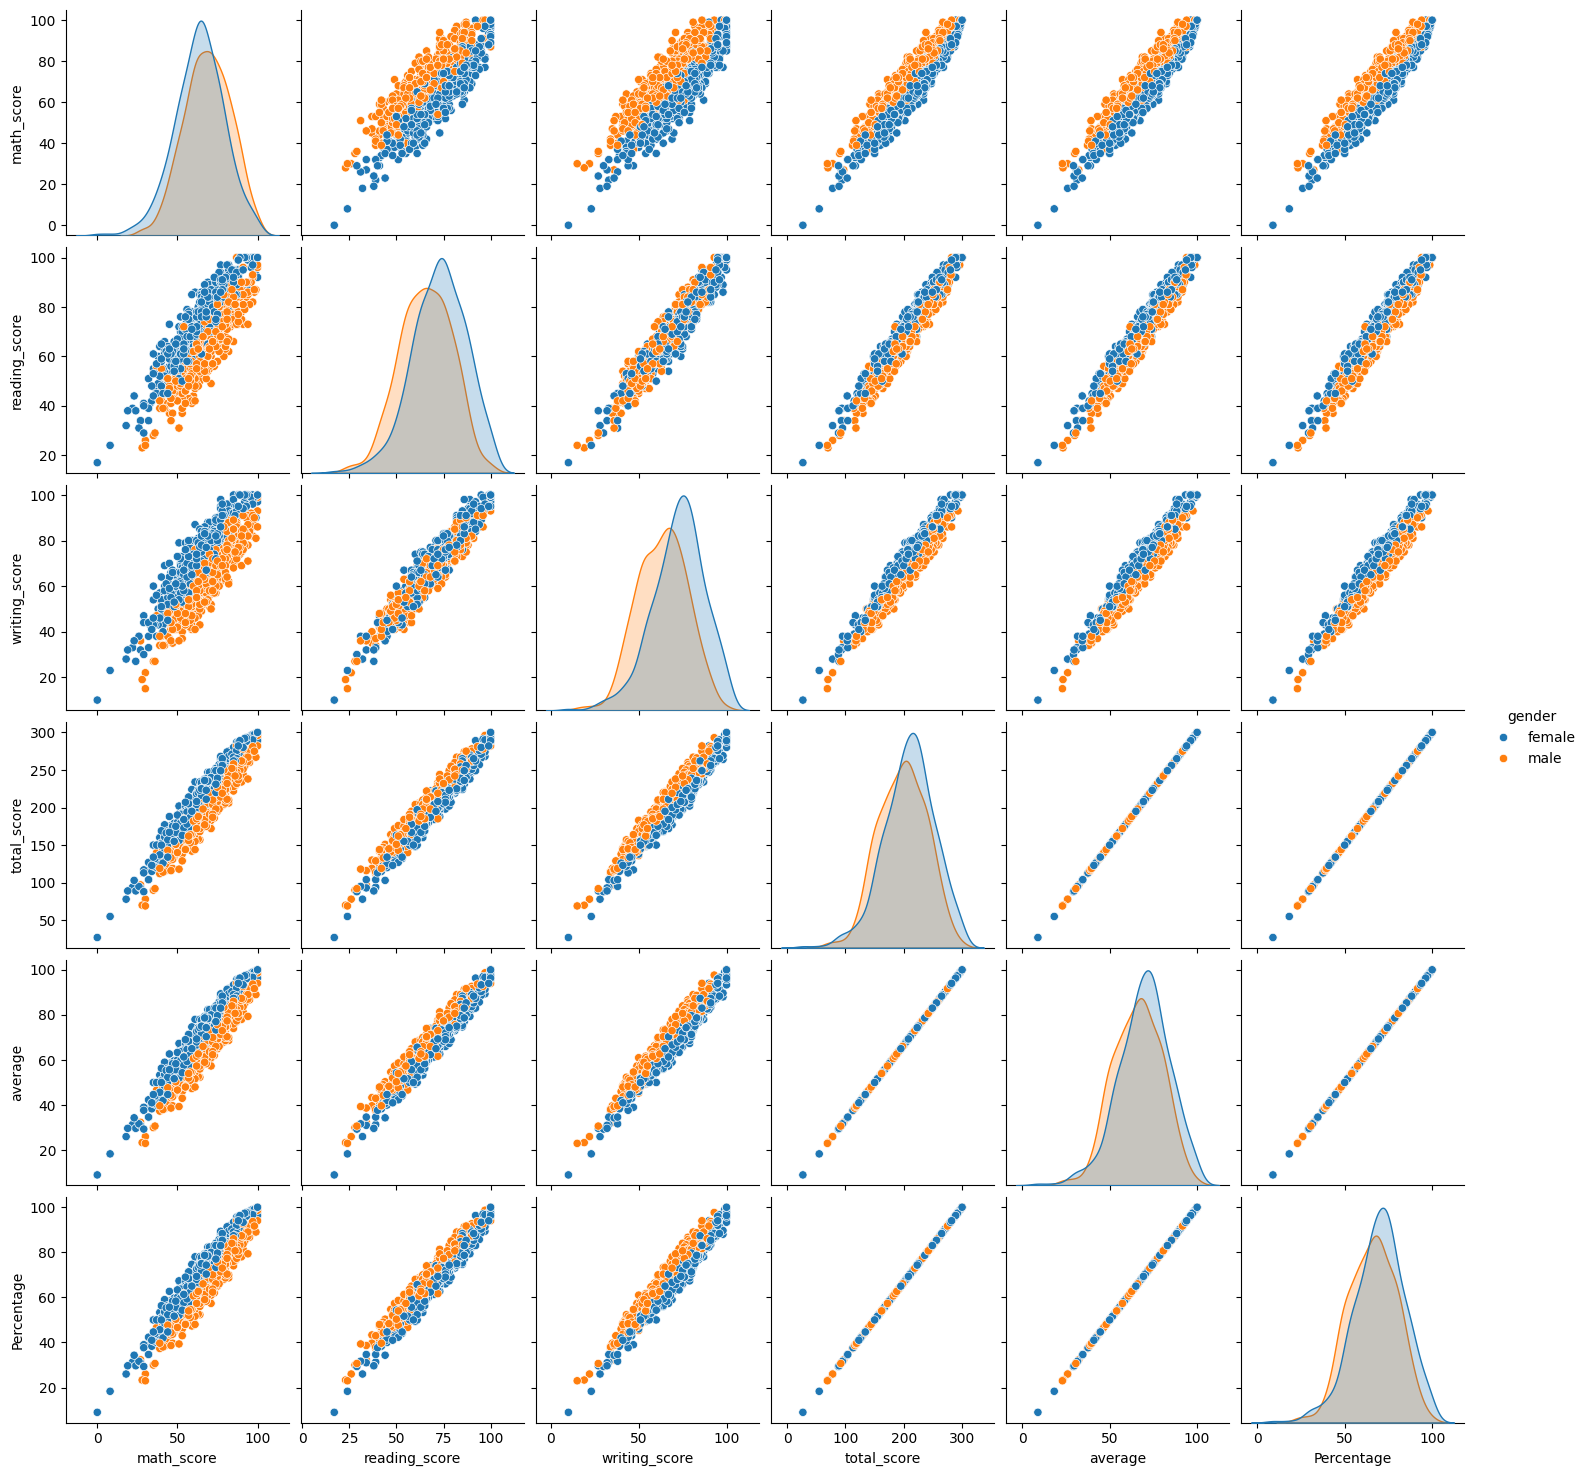

In [24]:
sns.pairplot(dataset,hue = 'gender')
plt.show()

<Axes: >

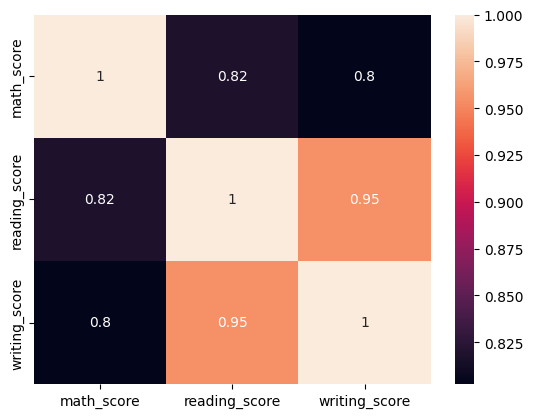

In [26]:
correlation = dataset[numeric_col].corr()
sns.heatmap(correlation, annot=True)